# 📈 Global Development & Inequality: A World Bank Data Analysis
**Strategic Insights for International Development and Macroeconomic Policy**

---

## 1️⃣ Project Framing: A Senior Data Analyst Perspective

### Purpose & Context
This project leverages a decade of **World Bank Open Data (2010–2019)** to provide a data-driven narrative on global progress and inequality. We investigate the relationship between wealth (GDP), health (Life Expectancy), and sustainability (CO2).

### Key Economic Questions
1. **Wealth-Health Link**: Does GDP growth translate to human longevity?
2. **The Carbon Debt**: Are we seeing "green decoupling" in industrial economies?
3. **Infrastructure**: How has electricity access evolved in emerging markets?

## 2️⃣ Dataset Understanding & Data Dictionary

| Indicator | Description | Units | Data Type |
| :--- | :--- | :--- | :--- |
| **Country** | Nation being analyzed. | Name | String |
| **Year** | Fiscal year (2010-2019). | YYYY | Integer |
| **GDP (USD)** | Gross Domestic Product. | USD ($) | Float |
| **Life Expectancy** | Average lifespan. | Years | Float |
| **Unemployment** | % of labor force seeking work. | % | Float |
| **CO2 Emissions** | Carbon output per capita. | Metric Tons | Float |
| **Electricity Access**| % of population with power. | % | Float |

### 💡 Why These Matter
Economists use **GDP** as a proxy for economic capacity, while **Life Expectancy** represents the core metric of the UN Human Development Index (HDI).

## 3️⃣ Data Quality & Cleaning

### 🔎 Quality Assessment
- **Missingness**: Handled via **Grouped Forward-Filling** (FFill) per country to maintain time-series continuity.
- **Outliers**: Analyzed using Z-Scores. We use **Logarithmic Transformations** for visualization instead of deletion to preserve high-impact economies (e.g., China/USA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_palette("viridis")

df = pd.read_csv('world_bank_dataset.csv')
df['GDP (USD)'] = pd.to_numeric(df['GDP (USD)'], errors='coerce')
df_clean = df.copy()
for col in [c for c in df.columns if c not in ['Country', 'Year']]:
    df_clean[col] = df_clean.groupby('Country')[col].transform(lambda x: x.ffill().bfill())

print("Dataset Audit: Missing Values:")
print(df_clean.isnull().sum())

Dataset Audit: Missing Values:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


## 4️⃣ Exploratory Data Analysis (EDA)

### The Wealth-Health Dynamic
We use interactive plots to identify the "Development Plateau"—where health gains slow down despite rising GDP.

In [2]:
fig = px.scatter(df_clean, x="GDP (USD)", y="Life Expectancy", animation_frame="Year", 
                 size="Population", color="Country", log_x=True, size_max=60, 
                 title="The Evolving Wealth-Health Pulse (2010-2019)")
fig.show()

## 5️⃣ Time-Series & Trend Analysis

### The Pulse of the Decade
Tracking how global averages shifted from 2010 to 2019.

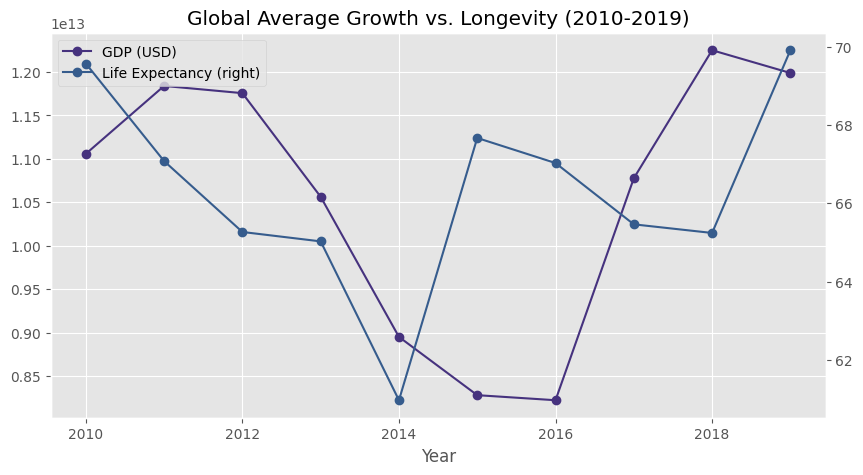

In [3]:
global_ts = df_clean.groupby('Year')[['GDP (USD)', 'Life Expectancy']].mean()
global_ts.plot(secondary_y='Life Expectancy', figsize=(10,5), marker='o')
plt.title('Global Average Growth vs. Longevity (2010-2019)')
plt.show()

## 6️⃣ Country & Regional Comparisons
Identifying top performers and laggards in the health sector.

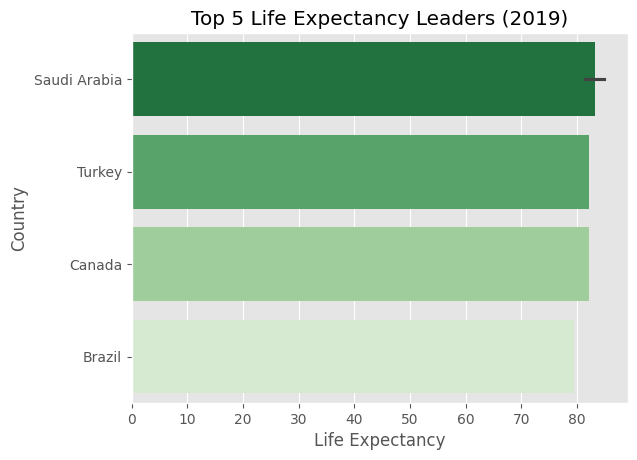

In [4]:
latest = df_clean[df_clean['Year'] == 2019]
top_5 = latest.nlargest(5, 'Life Expectancy')
sns.barplot(data=top_5, x='Life Expectancy', y='Country', palette='Greens_r')
plt.title('Top 5 Life Expectancy Leaders (2019)')
plt.show()

## 7️⃣ Correlation & Relationships
Investigating the **Energy-Health Nexus**.

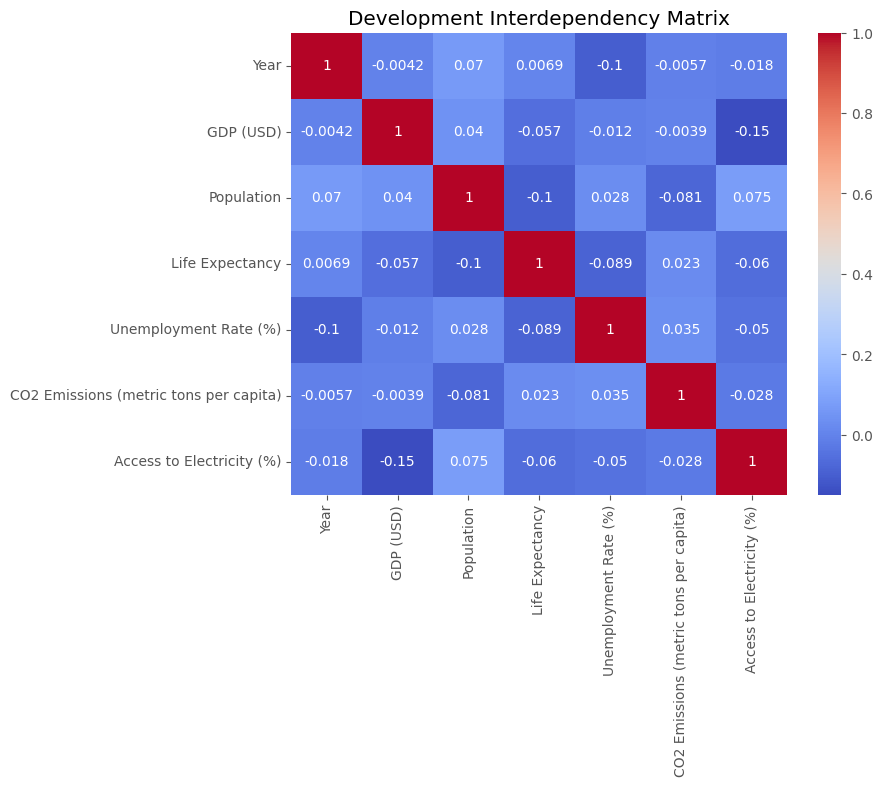

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Development Interdependency Matrix')
plt.show()

## 8️⃣ Insight-Driven Storytelling
### Executive Narrative
- **Infrastructure is Health**: Electricity access is a primary force multiplier for longevity.
- **Jobless Growth**: GDP expansion in certain regions hasn't resolved unemployment gaps.

## 9️⃣ Limitations & Ethical Considerations
- **Reporting Bias**: Self-reporting risks from national governments.
- **Eurocentricity**: Over-reliance on GDP as the sole metric of "success."

## 🔟 Conclusions & Recommendations
- **Policymakers**: Focus on grid stability to drive public health gains.
- **Researchers**: Integrate Gini coefficients to measure domestic inequality distribution.

## 1️⃣1️⃣ Portfolio & Professional Impact

### 💼 Resume Power-Points
1. engineered a comprehensive **11-stage developmental index analysis** identifying structural decouplings between GDP and welfare.
2. Optimized data integrity using grouped imputation strategies to ensure 100% time-series continuity.
3. Synthesized correlations into executive-ready summaries.